<a href="https://colab.research.google.com/github/JFGoes/PCT30038--CalculoNumerico/blob/master/MetodoSecante_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Método da Secante

In [13]:
from sympy.plotting import *
import sympy as sp
from math import log, ceil,sin,cos,tan,exp
import matplotlib.pyplot as plt


In [3]:
x = sp.Symbol('x')#Define uma variável

In [4]:
#funcao = x**4 - 2 * x**3 - 4 * x**2+ 4*x + 4
funcao = x**3 - 9*x + 3

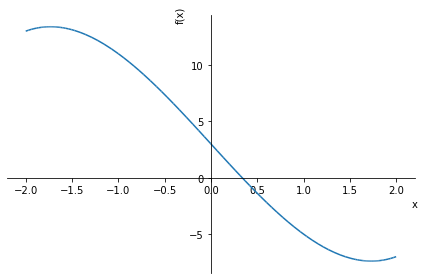

In [6]:
plot(funcao,(x,-2,2))

Definição da função para obter as raizes, $f(x) = 0$:

Método da Secante implementado a partir do algoritmo do livro cálculo numérico - Rugiere

In [23]:
lerro =[] # lista para plot do erro

def secante(x0,x1,f,tol,iter_max):
  iter = 0
  
  if abs(f(x0)) < tol:
     return (f'A raiz esperar é: {x0:.6f}')

  erro = abs((x1-x0)) # calculo do erro: | x1-x0| < tol
  lerro.append(erro) # adicionar valores do erro

  if abs(f(x1)) < tol or erro < tol:
     return (f'A raiz esperar é: {x1:.6f}')

  print(f'{"iter":^5}| {"x2":^9}| {"x1":^9}| {"f(x2)":^8} | {"|x2-x1|":^9} ')
  print('-----|----------|----------|----------|----------|-----------')
  print(f'{iter:^5}| {x1:^9.6f}| {x0:^9.6f}| {abs(f(x1)):^8.4f} | {erro:^2.4E}')

  while iter < iter_max:
    x2 = x1 - f(x1)*(x1 - x0)/(f(x1) - f(x0))
    erro = abs((x2-x1)) # calculo do erro: | x1-x0| < tol
    iter+=1
    print(f'{iter:^5}| {x2:^9.6f}| {x1:^9.6f}| {abs(f(x2)):^8.4f} | {erro:^2.4E}')
    
    if abs(f(x2)) < tol or erro < tol:
      lerro.append(erro)
      return (f'A raiz esperar é: {x2:.6f}')
    else:
      x0 = x1
      x1 = x2
      
    lerro.append(erro)
  
  return 'O método não convergiu após '+ str(iter_max) + 'iterações'


iter |    x2    |    x1    |  f(x2)   |  |x2-x1|  
-----|----------|----------|----------|----------|-----------
  0  | 1.000000 | 0.000000 |  5.0000  | 1.0000E+00
  1  | 0.375000 | 1.000000 |  0.3223  | 6.2500E-01
  2  | 0.331942 | 0.375000 |  0.0491  | 4.3058E-02
  3  | 0.337635 | 0.331942 |  0.0002  | 5.6931E-03
  4  | 0.337609 | 0.337635 |  0.0000  | 2.5648E-05


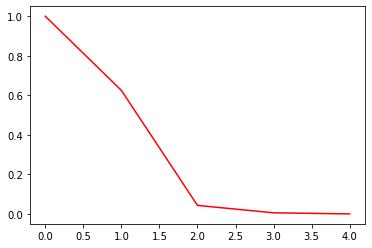

In [24]:
#definição da função f(x)
f = lambda x: x**3 - 9*x + 3

#Raiz no intervalo [0,0.5]
x0 = 0.
x1 = 1.
err = 5*10**(-6)
secante(x0,x1,f,err,100)

plt.plot(lerro,'r')

Outro teste:

iter |    x2    |    x1    |  f(x2)   |  |x2-x1|  
-----|----------|----------|----------|----------|-----------
  0  | 0.500000 | 0.000000 |  1.3750  | 5.0000E-01
  1  | -1.333333| 0.500000 |  2.0370  | 1.8333E+00
  2  | 4.307692 | -1.333333| 74.6268  | 5.6410E+00
  3  | -1.183445| 4.307692 |  1.4740  | 5.4911E+00
  4  | -1.077086| -1.183445|  1.1725  | 1.0636E-01
  5  | -0.663569| -1.077086|  0.6286  | 4.1352E-01
  6  | -0.185591| -0.663569|  0.8208  | 4.7798E-01
  7  | -2.226982| -0.185591|  9.8176  | 2.0414E+00
  8  | 0.000650 | -2.226982|  1.0006  | 2.2276E+00
  9  | 0.253467 | 0.000650 |  1.2372  | 2.5282E-01
 10  | -1.068889| 0.253467 |  1.1523  | 1.3224E+00
 11  | -19.029964| -1.068889| 6873.4724 | 1.7961E+01
 12  | -1.065878| -19.029964|  1.1451  | 1.7964E+01
 13  | -1.062885| -1.065878|  1.1379  | 2.9932E-03
 14  | -0.588515| -1.062885|  0.6153  | 4.7437E-01
 15  | -0.029947| -0.588515|  0.9701  | 5.5857E-01
 16  | -1.557322| -0.029947|  3.2196  | 1.5274E+00
 17  | 0.628722 |

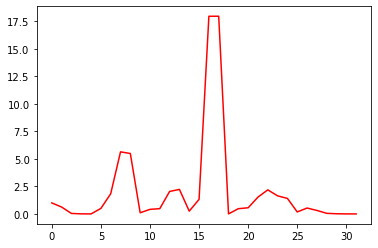

In [25]:
#definição da função f(x)
f = lambda x: x**3 - x -1

#Raiz no intervalo [0,0.5]
x0 = 0.
x1 = 0.5
err = 5*10**(-6)
secante(x0,x1,f,err,100)

plt.plot(lerro,'r')

iter |    x2    |    x1    |  f(x2)   |  |x2-x1|  
-----|----------|----------|----------|----------|-----------
  0  | 1.000000 | 0.000000 |  0.6476  | 1.0000E+00
  1  | 0.606943 | 1.000000 |  0.4466  | 3.9306E-01
  2  | -0.266518| 0.606943 |  1.8195  | 8.7346E-01
  3  | 0.434798 | -0.266518|  0.1403  | 7.0132E-01
  4  | 0.384607 | 0.434798 |  0.0317  | 5.0192E-02
  5  | 0.369925 | 0.384607 |  0.0014  | 1.4681E-02
  6  | 0.370564 | 0.369925 |  0.0000  | 6.3859E-04
  7  | 0.370558 | 0.370564 |  0.0000  | 5.7406E-06


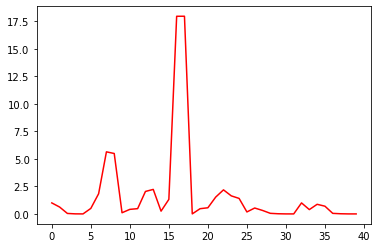

In [26]:
#definição da função f(x)
f = lambda x: 4 * sin(x) - exp(x)

#Raiz no intervalo [0,0.5]
x0 = 0.
x1 = 1.0
err = 5*10**(-6)
secante(x0,x1,f,err,100)

plt.plot(lerro,'r')